<a href="https://colab.research.google.com/github/plaban1981/Air-Quality-Index-Prediction/blob/master/AQI_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apply ML algorithms
- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/Real_Combine.csv')

## Check first five rows in the dataframe

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


##Check for null values in the sample data

In [4]:
print(df.isnull().sum()[df.isnull().sum() > 0])

PM 2.5    2
dtype: int64


## Visualization - detect null values

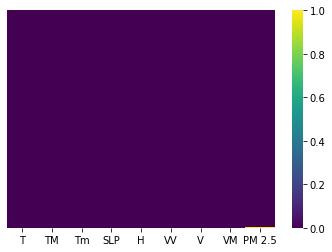

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

## The output label PM2.5 has null values. 

#### Dropping NULL Values

In [0]:
df = df.dropna()

## Identifying Independent and Dependent Features

In [0]:
X = df.drop('PM 2.5',axis=1)
Y = df['PM 2.5']

## Find Correlation Between the Features

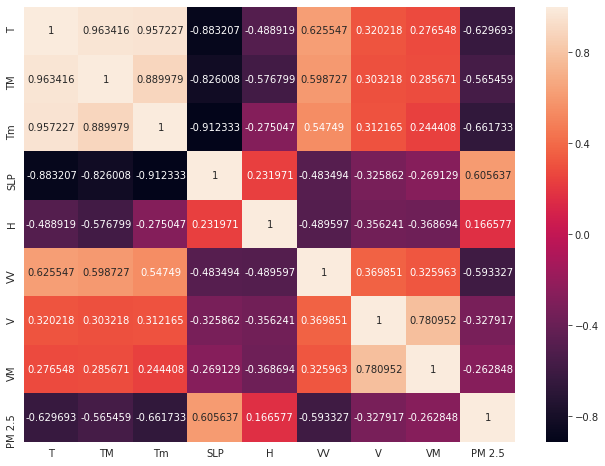

In [8]:
plt.figure(figsize=(11,8))
sns.set_style('whitegrid')
sns.heatmap(df.corr(),annot=True,fmt='g')

## Finding highly corelated Features

In [0]:
abs_corr_mat = X.corr().abs()
up_tri = abs_corr_mat.where(np.triu(np.ones(abs_corr_mat.shape),k=1).astype(np.bool))

In [10]:
up_tri

,T,TM,Tm,SLP,H,VV,V,VM
T,NaN,0.963416,0.957227,0.883207,0.488919,0.625547,0.320218,0.276548
TM,NaN,NaN,0.889979,0.826008,0.576799,0.598727,0.303218,0.285671
Tm,NaN,NaN,NaN,0.912333,0.275047,0.547490,0.312165,0.244408
SLP,NaN,NaN,NaN,NaN,0.231971,0.483494,0.325862,0.269129
H,NaN,NaN,NaN,NaN,NaN,0.489597,0.356241,0.368694
VV,NaN,NaN,NaN,NaN,NaN,NaN,0.369851,0.325963
V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780952
VM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Finding features which have a corelation > 0.90

In [0]:
correlated_features = [col for col in up_tri.columns if any(up_tri[col] > 0.90)]

In [12]:
print(correlated_features)

['TM', 'Tm', 'SLP']


##Finding the best Feature - using Univariate Feature Selection

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1088
Data columns (total 9 columns):
T         1088 non-null float64
TM        1088 non-null float64
Tm        1088 non-null float64
SLP       1088 non-null float64
H         1088 non-null float64
VV        1088 non-null float64
V         1088 non-null float64
VM        1088 non-null float64
PM 2.5    1088 non-null float64
dtypes: float64(9)
memory usage: 85.0 KB


In [0]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [15]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [16]:
Y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

##Feature selection method: SelectKBest

####Score function:
- For regression: f_regression, mutual_info_regression
- For classification: chi2, f_classif, mutual_info_classif

####Advantages:

- Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression

select_feature = SelectKBest(score_func=f_regression,k=5)
select_feature.fit(X,Y)
X_sel_Features = select_feature.transform(X) 


In [18]:
print(select_feature.get_support())

[ True  True  True  True False  True False False]


In [0]:
Selected_feature_names=X.columns[select_feature.get_support()]

In [20]:
Selected_feature_names

Index(['T', 'TM', 'Tm', 'SLP', 'VV'], dtype='object')

## Using Wrapper Method

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 5 features for the dataset.

In [21]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [22]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [23]:
print(model.feature_importances_)

[0.15820461 0.12408259 0.24510594 0.13084639 0.07820756 0.16465953
 0.05729941 0.04159397]


##plot graph of feature importances for better visualization

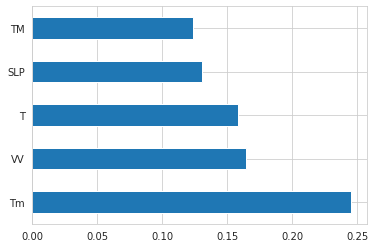

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Linear Regression

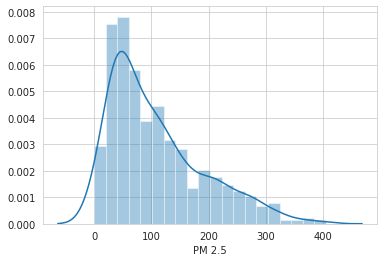

In [25]:
sns.distplot(Y)

####Note : did not eliminate features(Highly Corelated and Feature Importance) as the actual number of features is already less

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(regressor.coef_)

[  1.56398377   1.18885299  -7.06045029   0.1481327   -0.61587428
 -44.67787597  -1.24645423  -0.40966483]


In [29]:
print(regressor.intercept_)

160.16863407898836


In [30]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5462467015550507


In [31]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.5355110060472243


##Cros Validation Score

In [0]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,Y,cv=5)

In [33]:
print(np.mean(score))

0.4962057187240264


##Model Evaluation

In [34]:
coeff_df = pd.DataFrame(data=regressor.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,1.563984
TM,1.188853
Tm,-7.060450
SLP,0.148133
H,-0.615874
VV,-44.677876
V,-1.246454
VM,-0.409665



####Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an increase of 1.563 units in AQI PM2.5 .
- Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 1.188 units in AQI PM 2.5 .

In [0]:
y_pred = regressor.predict(X_test)

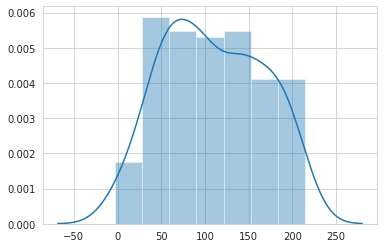

In [36]:
sns.distplot(y_pred)

## Visualization of Actual value and Predicted values

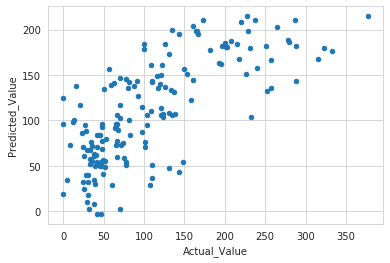

In [37]:
df_pred = pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred})
df_pred.plot.scatter(x='Actual_Value',y='Predicted_Value')

#### Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
- **Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

####Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
-MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
-RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [0]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [39]:
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test,y_pred))}')
print(f'R squared error : {r2_score(y_test,y_pred)}')

Mean Absolute Error : 42.265724631219875
Mean Squared Error : 3077.2835731107016
Root Mean Squared Error : 55.47326899607325
R squared error : 0.5355110060472243


## Visualization of the model Performance

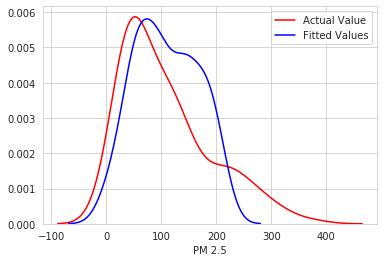

In [43]:
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
